# Interpolacija

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Interpolacija s polinomom - Lagrangeva interpolacija

In [2]:
def lagrange_polinom_i(x, i, x_int):
    '''
    Vrne vrednosti i-tega Lagrangevega polinoma l_i pri
    znanih vrednostih x, za željene nove točke x_int.
    '''
    xi = x[i]
    xj = np.array([_ for _ in x if _!=xi])
    l_i = np.zeros_like(x_int)
    for j, X in enumerate(x_int):
        l_i[j] = np.prod((X - xj)/(xi - xj))
    return l_i

In [3]:
x = np.linspace(0,1,3)
y = np.random.rand(len(x)) # random y vrednosti pri x
x_int = np.linspace(x[0], x[-1], 100) # Zanima nas 100 točk na vmesnem območju pri x

In [37]:
lagrange_polinom_i(x, i, x_int)

array([-0.        , -0.00989695, -0.01938578, -0.02846648, -0.03713907,
       -0.04540353, -0.05325987, -0.06070809, -0.06774819, -0.07438017,
       -0.08060402, -0.08641975, -0.09182736, -0.09682685, -0.10141822,
       -0.10560147, -0.10937659, -0.1127436 , -0.11570248, -0.11825324,
       -0.12039588, -0.12213039, -0.12345679, -0.12437506, -0.12488522,
       -0.12498725, -0.12468115, -0.12396694, -0.12284461, -0.12131415,
       -0.11937557, -0.11702887, -0.11427405, -0.11111111, -0.10754005,
       -0.10356086, -0.09917355, -0.09437812, -0.08917457, -0.0835629 ,
       -0.07754311, -0.07111519, -0.06427916, -0.057035  , -0.04938272,
       -0.04132231, -0.03285379, -0.02397715, -0.01469238, -0.00499949,
        0.00510152,  0.01561065,  0.02652791,  0.03785328,  0.04958678,
        0.0617284 ,  0.07427813,  0.087236  ,  0.10060198,  0.11437608,
        0.12855831,  0.14314866,  0.15814713,  0.17355372,  0.18936843,
        0.20559127,  0.22222222,  0.2392613 ,  0.2567085 ,  0.27

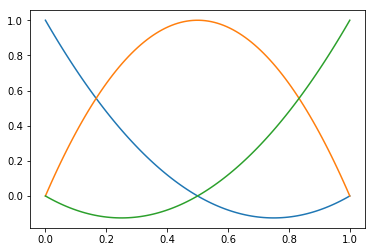

In [6]:
for i in range(len(x)):
    plt.plot(x_int, lagrange_polinom_i(x, i, x_int)) #lagrangevi polinomi

### Vprašanja

In [19]:
def lagrange_interpolacija(x, y, x_int):
    l = np.zeros(x_int.shape)
    for i in range(len(x)):
        l_i = lagrange_polinom_i(x, i, x_int)
        l += l_i*y[i]
    return l

In [20]:
y_int = lagrange_interpolacija(x, y, x_int)
y_int

array([ 0.13557785,  0.13109689,  0.12675984,  0.12256669,  0.11851745,
        0.11461211,  0.11085068,  0.10723315,  0.10375953,  0.10042981,
        0.097244  ,  0.09420209,  0.09130409,  0.08854999,  0.0859398 ,
        0.08347352,  0.08115114,  0.07897266,  0.07693809,  0.07504743,
        0.07330067,  0.07169781,  0.07023886,  0.06892382,  0.06775268,
        0.06672545,  0.06584212,  0.0651027 ,  0.06450718,  0.06405557,
        0.06374786,  0.06358406,  0.06356416,  0.06368817,  0.06395608,
        0.0643679 ,  0.06492362,  0.06562325,  0.06646679,  0.06745423,
        0.06858557,  0.06986082,  0.07127998,  0.07284304,  0.07455   ,
        0.07640087,  0.07839565,  0.08053433,  0.08281692,  0.08524341,
        0.08781381,  0.09052811,  0.09338632,  0.09638843,  0.09953445,
        0.10282437,  0.1062582 ,  0.10983593,  0.11355757,  0.11742311,
        0.12143256,  0.12558592,  0.12988318,  0.13432434,  0.13890941,
        0.14363839,  0.14851127,  0.15352805,  0.15868874,  0.16

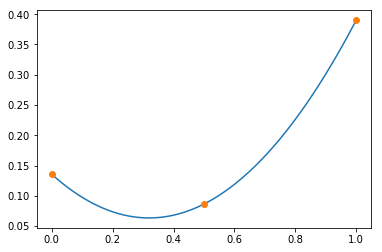

In [13]:
plt.plot(x_int, y_int) 
plt.plot(x, y, 'o'); #podpičje - da ne izpiše unga odspodi

In [14]:
from scipy.interpolate import lagrange

In [16]:
polinom = lagrange(x, y)
polinom #pythonov objekt

poly1d([ 0.70520751, -0.45073822,  0.13557785])

In [21]:
y_int2 = polinom(x_int)
y_int2

array([ 0.13557785,  0.13109689,  0.12675984,  0.12256669,  0.11851745,
        0.11461211,  0.11085068,  0.10723315,  0.10375953,  0.10042981,
        0.097244  ,  0.09420209,  0.09130409,  0.08854999,  0.0859398 ,
        0.08347352,  0.08115114,  0.07897266,  0.07693809,  0.07504743,
        0.07330067,  0.07169781,  0.07023886,  0.06892382,  0.06775268,
        0.06672545,  0.06584212,  0.0651027 ,  0.06450718,  0.06405557,
        0.06374786,  0.06358406,  0.06356416,  0.06368817,  0.06395608,
        0.0643679 ,  0.06492362,  0.06562325,  0.06646679,  0.06745423,
        0.06858557,  0.06986082,  0.07127998,  0.07284304,  0.07455   ,
        0.07640087,  0.07839565,  0.08053433,  0.08281692,  0.08524341,
        0.08781381,  0.09052811,  0.09338632,  0.09638843,  0.09953445,
        0.10282437,  0.1062582 ,  0.10983593,  0.11355757,  0.11742311,
        0.12143256,  0.12558592,  0.12988318,  0.13432434,  0.13890941,
        0.14363839,  0.14851127,  0.15352805,  0.15868874,  0.16

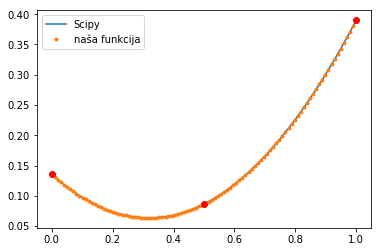

In [23]:
plt.plot(x_int, y_int, label='Scipy')
plt.plot(x_int, y_int2, '.', label = 'naša funkcija')
plt.plot(x, y, 'ro')
plt.legend() #se prekrivajo

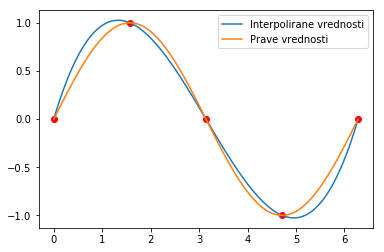

In [34]:
x2 = np.linspace(0, 2*np.pi, 5)
y2 = np.sin(x2)
x_int3 = np.linspace(x2[0], x2[-1], 100)
polinom2 = lagrange(x2, y2)
y_int3 = polinom2(x_int3)
plt.plot(x2, y2, 'ro')
plt.plot(x_int3, y_int3, label='Interpolirane vrednosti') #interpolirane vrednosti
plt.plot(x_int3, np.sin(x_int3), label='Prave vrednosti') #prave vrednosti
plt.legend()

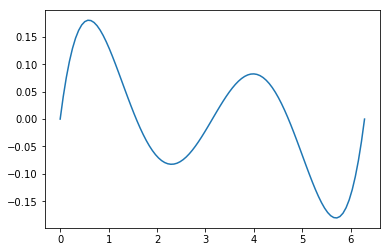

In [36]:
napaka = y_int3 - np.sin(x_int3)
plt.plot(x_int3, napaka) #malo prevč, malo premalo zračunali - 0=točno

## Naravni kubični zlepki
* v prof. predavanjih
* na teoriji znat iz kje pridejo pogoji

## Interpolacija B-zlepkov v scipy
* razlika v dodatnih pogojih - se razlikujejo v od naravnih - bolj napredni so B-zlepki

In [38]:
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline

In [39]:
x = np.linspace(0, 1, 10)
y = np.random.rand(len(x)) - 0.5
x_int = np.linspace(x[0], x[-1], 100)

In [40]:
f_interp1d = interp1d(x, y, kind=3) #tretji red
f_IUS = InterpolatedUnivariateSpline(x, y, k=3) #tab- napiše do konca

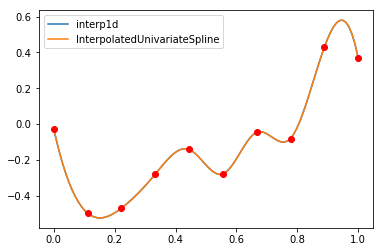

In [55]:
plt.plot(x_int, f_interp1d(x_int), label='interp1d')
plt.plot(x_int, f_IUS(x_int), label='InterpolatedUnivariateSpline')
plt.plot(x, y, 'ro')
plt.legend(); #vrneta isto stvar! InterpolatedUnivariateSpline ima več metod (objekt f_IUS -> f_IUS.metode)

In [43]:
help(InterpolatedUnivariateSpline) #utežitev- če enim točkam bolj zaupamo kot drugim
#antiderivate = integral
#derivative = vrne odvod zlepka
#get_coeffs() = vrne koeficiente
#get_knots() = položaji vozlov
#roots = ničle polinoma

Help on class InterpolatedUnivariateSpline in module scipy.interpolate.fitpack2:

class InterpolatedUnivariateSpline(UnivariateSpline)
 |  One-dimensional interpolating spline for a given set of data points.
 |  
 |  Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data. Spline
 |  function passes through all provided points. Equivalent to
 |  `UnivariateSpline` with  s=0.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      Input dimension of data points -- must be increasing
 |  y : (N,) array_like
 |      input dimension of data points
 |  w : (N,) array_like, optional
 |      Weights for spline fitting.  Must be positive.  If None (default),
 |      weights are all equal.
 |  bbox : (2,) array_like, optional
 |      2-sequence specifying the boundary of the approximation interval. If
 |      None (default), ``bbox=[x[0], x[-1]]``.
 |  k : int, optional
 |      Degree of the smoothing spline.  Must be 1 <= `k` <= 5.
 |  ext : int or str, optional
 |     

### Vprašanja

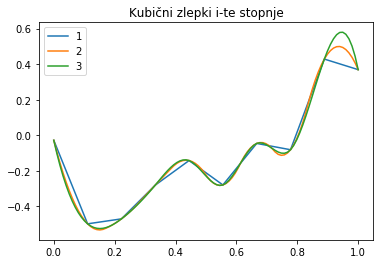

In [48]:
for i in range(1, 4):
    f = interp1d(x, y, kind=i)
    plt.plot(x_int, f(x_int), label=f'{i}')
plt.legend()
plt.title('Kubični zlepki i-te stopnje');

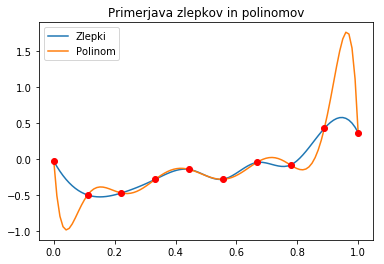

In [54]:
f1 = InterpolatedUnivariateSpline(x, y)
plt.plot(x_int, f1(x_int), label='Zlepki')
polinom5 = lagrange(x, y)
plt.plot(x_int, polinom5(x_int), label='Polinom')
plt.plot(x, y, 'ro')
plt.title('Primerjava zlepkov in polinomov')
plt.legend();

* lagrangev polinom je zelo visoke stopnje - čudna funkcija
* zlepek je lepši (numerično zahtevnejši

In [56]:
t = np.array([0, 1, 2, 3, 4, 5])
a = np.array([5, 3, 0, 0, -4, -3])
t_int = np.linspace(t[0], t[-1], 50)

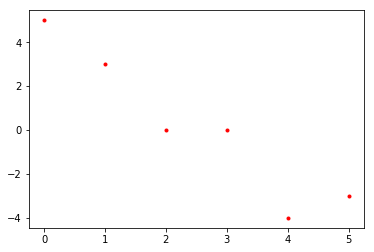

In [57]:
plt.plot(t, a, 'r.') #pospeški avtomobila - želimo pot! -> integriramo

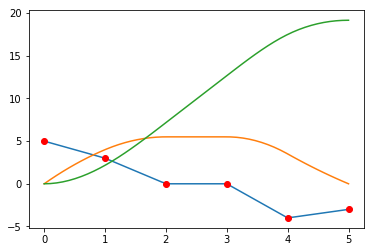

In [68]:
pospesek = InterpolatedUnivariateSpline(t, a, k=1) #pospešek se je linearno  povečeval k=1
hitrost = pospesek.antiderivative() #integral
pot = pospesek.antiderivative(2) #drugi integral
plt.plot(t_int, pospesek(t_int)) #pospeški = prvi red
plt.plot(t_int, hitrost(t_int)) #hitrost = drugi red
plt.plot(t_int, pot(t_int)) #pot = tretji red
plt.plot(t, a, 'ro')

In [69]:
#integrate - določen integral
#antiderivative- nedoločen integral

In [75]:
integral = pot.integral(t[0], t[-1]) #meje
integral

49.083333333333336